In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv(r'C:\Users\admin\Desktop\Study Material\SEM V\Machine Learning\Housing .csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [4]:
# List of variables to map
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [5]:
from sklearn.preprocessing import OneHotEncoder

# Select the 'furnishingstatus' column
furnishingstatus = data[['furnishingstatus']]

# Initialize OneHotEncoder with the updated argument
encoder = OneHotEncoder(sparse_output=False)

# Apply the encoder to the 'furnishingstatus' column
encoded_furnishingstatus = encoder.fit_transform(furnishingstatus)

# Create a DataFrame with the encoded values and the original column names
encoded_data = pd.DataFrame(encoded_furnishingstatus, columns=encoder.get_feature_names_out(['furnishingstatus']))

# Concatenate the encoded columns back to the original dataframe
data_encoded = pd.concat([data, encoded_data], axis=1).drop(columns=['furnishingstatus'])

# Display the first few rows of the new dataframe
data_encoded.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0,0.0,0.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0,0.0,0.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.0,1.0,0.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0,0.0,0.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0,0.0,0.0


In [6]:
# Defining independent variables in x
x = data_encoded.iloc[:,1:].values
print(pd.DataFrame(x))

         0    1    2    3    4    5    6    7    8    9    10   11   12   13
0    7420.0  4.0  2.0  3.0  1.0  0.0  0.0  0.0  1.0  2.0  1.0  1.0  0.0  0.0
1    8960.0  4.0  4.0  4.0  1.0  0.0  0.0  0.0  1.0  3.0  0.0  1.0  0.0  0.0
2    9960.0  3.0  2.0  2.0  1.0  0.0  1.0  0.0  0.0  2.0  1.0  0.0  1.0  0.0
3    7500.0  4.0  2.0  2.0  1.0  0.0  1.0  0.0  1.0  3.0  1.0  1.0  0.0  0.0
4    7420.0  4.0  1.0  2.0  1.0  1.0  1.0  0.0  1.0  2.0  0.0  1.0  0.0  0.0
..      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
540  3000.0  2.0  1.0  1.0  1.0  0.0  1.0  0.0  0.0  2.0  0.0  0.0  0.0  1.0
541  2400.0  3.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
542  3620.0  2.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
543  2910.0  3.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
544  3850.0  3.0  1.0  2.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0

[545 rows x 14 columns]


In [7]:
# Defining dependent variable in y
y = data.iloc[:, 0].values
y

array([13300000, 12250000, 12250000, 12215000, 11410000, 10850000,
       10150000, 10150000,  9870000,  9800000,  9800000,  9681000,
        9310000,  9240000,  9240000,  9100000,  9100000,  8960000,
        8890000,  8855000,  8750000,  8680000,  8645000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8400000,  8400000,
        8400000,  8400000,  8295000,  8190000,  8120000,  8080940,
        8043000,  7980000,  7962500,  7910000,  7875000,  7840000,
        7700000,  7700000,  7560000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7420000,  7420000,  7350000,  7350000,
        7350000,  7350000,  7343000,  7245000,  7210000,  7210000,
        7140000,  7070000,  7070000,  7035000,  7000000,  6930000,
        6930000,  6895000,  6860000,  6790000,  6790000,  6755000,
        6720000,  6685000,  6650000,  6650000,  6650000,  6650000,
        6650000,  6650000,  6629000,  6615000,  6615000,  6580000,
        6510000,  6510000,  6510000,  6475000,  6475000,  6440

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(x_train)

print(x_test)

print(y_train)

print(y_test)

[[3.62e+03 2.00e+00 1.00e+00 ... 0.00e+00 0.00e+00 1.00e+00]
 [4.00e+03 2.00e+00 1.00e+00 ... 0.00e+00 0.00e+00 1.00e+00]
 [3.04e+03 2.00e+00 1.00e+00 ... 0.00e+00 0.00e+00 1.00e+00]
 ...
 [5.75e+03 3.00e+00 2.00e+00 ... 0.00e+00 0.00e+00 1.00e+00]
 [3.60e+03 3.00e+00 1.00e+00 ... 0.00e+00 0.00e+00 1.00e+00]
 [6.60e+03 3.00e+00 1.00e+00 ... 1.00e+00 0.00e+00 0.00e+00]]
[[4.00e+03 3.00e+00 1.00e+00 ... 1.00e+00 0.00e+00 0.00e+00]
 [9.62e+03 3.00e+00 1.00e+00 ... 1.00e+00 0.00e+00 0.00e+00]
 [3.46e+03 4.00e+00 1.00e+00 ... 0.00e+00 1.00e+00 0.00e+00]
 ...
 [6.06e+03 2.00e+00 1.00e+00 ... 0.00e+00 1.00e+00 0.00e+00]
 [4.50e+03 2.00e+00 1.00e+00 ... 0.00e+00 1.00e+00 0.00e+00]
 [6.10e+03 3.00e+00 2.00e+00 ... 1.00e+00 0.00e+00 0.00e+00]]
[ 1750000  2695000  2870000  2590000  4515000  4410000  4585000  5250000
  3570000  3640000  9800000  2940000  6083000  3255000  4893000  3150000
  2975000  6930000  3500000  5880000  3500000  4235000  3710000  4060000
  2345000  4550000 10150000  3640000 

In [9]:
# Fitting Multiple Linear Regression to the Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [10]:
# predicting the Test set Results
y_pred = regressor.predict(x_test)
y_pred

array([ 3950288.61876184,  6173868.81883111,  4483635.98836252,
        7258732.75105288,  2836727.58490482,  7032947.09749074,
        3203851.47112392,  3270994.00904054,  3472554.03645915,
        8289978.32623725,  6605321.62954623,  3723366.23684094,
        3812376.95976085,  4548966.8454461 ,  4020476.34849668,
        1969836.22090135,  4057262.98087852,  3704586.86711741,
        3282767.93188792,  4609423.64909564,  5968243.7363716 ,
        6363698.62063814,  4751300.32389   ,  2659595.27633028,
        5305573.24662117,  5680819.58784461,  5404106.90027142,
        5543050.52192535,  5768360.47982209,  5801753.70839283,
        3389277.96110608,  6399092.02678424,  7081030.31411774,
        2913042.40387669,  4498664.01335423,  5210561.68059367,
        5013457.8412231 ,  3707596.71347575,  2916603.4548534 ,
        3937761.75634066,  8041334.20180917,  4942174.61142058,
        6432605.2198175 ,  3511338.78156424,  3813475.39540795,
        6434856.19540026,  4447687.02885

In [11]:
data = [{'Actual' : [y_test], 'Predicted' : [y_pred]}]
df = pd.DataFrame(data)
df

,Actual,Predicted
0,"[[4585000, 6083000, 4007500, 6930000, 2940000,...","[[3950288.6187618375, 6173868.818831114, 44836..."


In [27]:
regressor.coef_

array([ 2.53092382e+02,  1.22097933e+05,  9.96973689e+05,  4.33489800e+05,
        4.41026694e+05,  4.02848691e+05,  3.24747715e+05,  1.21083423e+06,
        8.71377886e+05,  2.16798687e+05,  6.93144410e+05,  1.99480684e+05,
        9.28208076e+04, -2.92301492e+05])

In [28]:
print(regressor.intercept_)

-149634.06511915848


In [29]:
regressor.score(x_test, y_test)

0.6611214250980093

In [30]:
from sklearn import metrics
print('Mean Absolute Error : ',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error :  716231.1189748812
Mean Squared Error :  976484771024.6141
Root Mean Squared Error :  988172.439923627


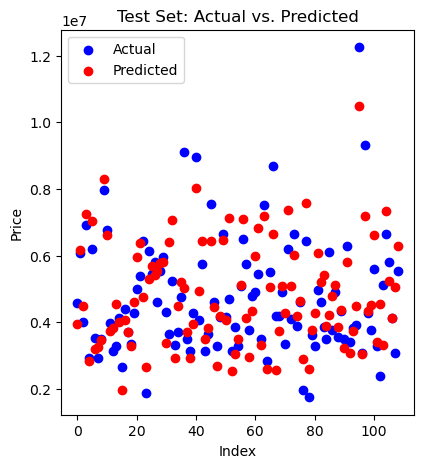

In [31]:
import matplotlib.pyplot as plt

# Plotting Actual vs. Predicted values for Test Set
plt.figure(figsize=(10, 5))

# Test Set
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.title('Test Set: Actual vs. Predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()

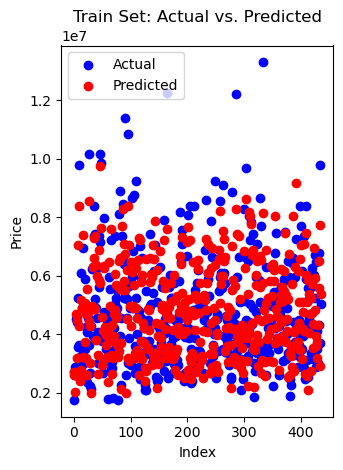

In [32]:
# Train Set
y_train_pred = regressor.predict(x_train)

plt.subplot(1, 2, 2)
plt.scatter(range(len(y_train)), y_train, color='blue', label='Actual')
plt.scatter(range(len(y_train_pred)), y_train_pred, color='red', label='Predicted')
plt.title('Train Set: Actual vs. Predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()